In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
import numpy as np

In [4]:
def get_data(path):
    labels=['nopain','moderate','severe']
    
    data = [] 
    for label in labels: 
        imm_path = os.path.join(path, label)
        print(imm_path)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(imm_path):
            print(img)
            try:
                img_arr = cv2.imread(os.path.join(imm_path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (224, 224)) # Reshaping images to preferred size
                arr=((resized_arr/255)-0.5)/0.5
                
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

        

In [5]:
path='/content/drive/MyDrive/data/train'
path2='/content/drive/MyDrive/data/val'
path3='/content/drive/MyDrive/data/test'

train=get_data(path)
val=get_data(path2)
test=get_data(path3)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
_0_332.png
_0_6825.png
_0_638.png
_0_3830.png
_0_3530.png
_0_2552.png
_0_8984.png
_0_1847.png
_0_6902.png
_0_8361.png
_0_7536.png
_0_449.png
_0_7603.png
_0_7389.png
_0_6215.png
_0_2679.png
_0_6950.png
_0_8854.png
_0_2048.png
_0_9602.png
_0_3325.png
_0_8219.png
_0_8893.png
_0_76.png
_0_2342.png
_0_313.png
_0_5578.png
_0_6798.png
_0_8916.png
_0_561.png
_0_1488.png
_0_7872.png
_0_7423.png
_0_6927.png
_0_4216.png
_0_5978.png
_0_5201.png
_0_539.png
_0_8702.png
_0_8908.png
_0_1779.png
_0_4440.png
_0_3424.png
_0_4718.png
_0_2602.png
_0_2308.png
_0_288.png
_0_9306.png
_0_132.png
_0_2218.png
_0_8524.png
_0_8653.png
_0_2376.png
_0_9128.png
_0_4704.png
_0_9535.png
_0_5329.png
_0_4480.png
_0_3209.png
_0_3965.png
_0_107.png
_0_8824.png
_0_2688.png
_0_2862.png
_0_7182.png
_0_8803.png
_0_922.png
_0_2495.png
_0_6427.png
_0_8972.png
_0_5591.png
_0_6348.png
_0_1530.png
_0_1980.png
_0_7148.png
_0_6356.png
_0_9046.png
_0_7477.pn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


/content/drive/MyDrive/data/val/nopain
0
aa048t2aeunaff015.png
dr052t2aaaff224.png
nm106t1aaaff143.png
vw121t1aeaff056.png
ak064t1aiunaff143.png
ll042t1aaaff041.png
aa048t2aeunaff004.png
nm106t1aaaff144.png
bg096t1aaaff005.png
bg096t1aaaff017.png
bn080t1aeaff095.png
jk103t1afunaff154.png
ll042t1aaaff042.png
aa048t2aeunaff003.png
bg096t1aaaff004.png
bn080t1aeaff094.png
aa048t2aaunaff007.png
aa048t2aaunaff019.png
th108t2afaff220.png
mg066t2aeunaff049.png
bn080t1aeaff082.png
dr052t2aaaff223.png
mg066t2aeunaff035.png
th108t2afaff219.png
jk103t1afunaff143.png
mg066t2aeunaff034.png
bg096t1aaaff016.png
aa048t2aeaff121.png
bn080t1aeaff083.png
ak064t1aiunaff131.png
ak064t1aiunaff142.png
mg066t2aeunaff050.png
jk103t1afunaff155.png
jk103t1afunaff142.png
aa048t2aeaff120.png
aa048t2aaunaff008.png
vw121t1aeaff055.png
aa048t2aaunaff020.png
_0_6743.png
_0_7060.png
_0_590.png
_0_4566.png
_0_528.png
_0_8319.png
_0_1222.png
_0_1849.png
_0_5192.png
_0_9032.png
_0_8402.png
_0_8835.png
_0_782.png
_0_4906.pn

In [ ]:
!nvidia-smi 

Sat Mar 13 21:46:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
x_train=[]
y_train=[]
for x,y in train:
    x_train.append(x)
    y_train.append(y)
x_val=[]
y_val=[]
for x,y in val:
    x_val.append(x)
    y_val.append(y)
x_test=[]
y_test=[]
for x,y in test:
    x_test.append(x)
    y_test.append(y)


In [7]:
x_train=np.array(x_train)
x_train.reshape(-1, 224, 224, 1)
y_train = np.array(y_train)
x_val=np.array(x_val)
x_val.reshape(-1, 224, 224, 1)
y_val = np.array(y_val)
x_test=np.array(x_test)

x_test.reshape(-1, 224, 224, 1)
y_test = np.array(y_test)


In [16]:
vgg19_model = tf.keras.applications.vgg19.VGG19()



In [17]:
model = Sequential()
for layer in vgg19_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=1028,activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-2),metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs =100,batch_size=16, validation_data = (x_val, y_val))

Epoch 1/100
604/604 [==============================] - 30s 49ms/step - loss: 5.4860 - accuracy: 0.7347 - val_loss: 0.6311 - val_accuracy: 0.7486
Epoch 2/100
604/604 [==============================] - 30s 49ms/step - loss: 0.3663 - accuracy: 0.8563 - val_loss: 0.5679 - val_accuracy: 0.8095
Epoch 3/100
604/604 [==============================] - 30s 49ms/step - loss: 0.2927 - accuracy: 0.8861 - val_loss: 0.7626 - val_accuracy: 0.7654
Epoch 4/100
604/604 [==============================] - 30s 49ms/step - loss: 0.2471 - accuracy: 0.9033 - val_loss: 0.4833 - val_accuracy: 0.8373
Epoch 5/100
604/604 [==============================] - 30s 49ms/step - loss: 0.2355 - accuracy: 0.9009 - val_loss: 0.5538 - val_accuracy: 0.8402
Epoch 6/100
604/604 [==============================] - 30s 49ms/step - loss: 0.1890 - accuracy: 0.9172 - val_loss: 0.4412 - val_accuracy: 0.8637
Epoch 7/100
604/604 [==============================] - 30s 49ms/step - loss: 0.2120 - accuracy: 0.9125 - val_loss: 0.5375 - val_ac

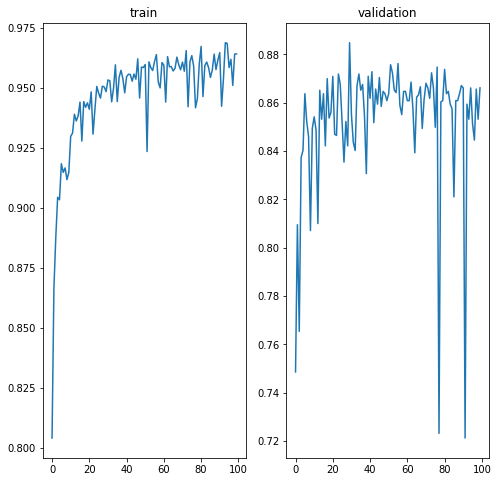

In [19]:
epochs=[i for i in range(100)]
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.plot(epochs,train_acc)
plt.title('train')
plt.subplot(122)
plt.plot(epochs,val_acc)
plt.title('validation')
plt.show()

In [20]:
results = model.evaluate(x_test, y_test)
print(results)

72/72 [==============================] - 5s 73ms/step - loss: 4.7105 - accuracy: 0.6499
[4.710495948791504, 0.6498696804046631]
